## LA Parking Citation - EDA Part II

<br> 

### Introduction

This is the second of a four-part exploratory data analysis project on an open source parking citation dataset. The project utilizes Python and several of its data science oriented packages (NumPy, SciPy, Matplotlib, Pandas, GeoPandas). The dataset I used for this EDA is available for free on [Kaggle](https://www.kaggle.com/) or at the Los Angeles open source data [website](https://data.lacity.org/). 


In this post, I wish to explore the date-time variables, visualizing how citations are issued through time. We'll look into how many tickets are issued each day, and how much the city makes in a day's worth of citations. We'll examine issuing trends over various lengths of time, identifying when you're least likely to recieve a parking ticket. Finally, we'll pick out holidays and see how citation trends in these special days compare to the normal trends. 

Let's do it!

### Load Libraries


We'll be using numpy, pandas, and matplotlib in this portion of the EDA. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

<br> 

### Combine Datasets

If you recall from the L.A. Parking Citations - EDA Part I, we divided the parking citation dataset into 4 equal parts so it could be stored on Github. Now that we're looking to work with the raw data once again, we should reload these datasets and combine them. 

In [8]:
# load individual sets
la_ticket_2017_1 = pd.read_csv("~/Documents/data_science/py_la_tickets/input/la_ticket_2017_1.csv")
la_ticket_2017_2 = pd.read_csv("~/Documents/data_science/py_la_tickets/input/la_ticket_2017_2.csv")
la_ticket_2017_3 = pd.read_csv("~/Documents/data_science/py_la_tickets/input/la_ticket_2017_3.csv")
la_ticket_2017_4 = pd.read_csv("~/Documents/data_science/py_la_tickets/input/la_ticket_2017_4.csv")

In [9]:
# combine dataset
la_ticket_2017 = pd.concat([la_ticket_2017_1, la_ticket_2017_2, la_ticket_2017_3, la_ticket_2017_4])

In [10]:
# view dataset
la_ticket_2017.head()

,Unnamed: 0,Issue time,Meter Id,RP State Plate,Make,Color,Location,Violation code,Violation Description,Fine amount,Latitude,Longitude,Month,Day
0,2777524,104.0,NaN,OR,TOYT,BL,1822 WINONA BLVD,80.56E4+,RED ZONE,93.0,6.470239e+06,1.860397e+06,3,1
1,2777558,1050.0,NaN,CA,HOND,BK,710 EL CENTRO AV,4000A1,NO EVIDENCE OF REG,50.0,9.999900e+04,9.999900e+04,3,28
2,2827647,115.0,NaN,CA,HOND,GY,7502 WILLIS AVENUE,22500E,BLOCKING DRIVEWAY,68.0,6.424012e+06,1.897916e+06,1,3
3,2827648,126.0,NaN,CA,FORD,WT,14957 FRIAR STREET,5204A-,DISPLAY OF TABS,25.0,6.422948e+06,1.890266e+06,1,3
4,2827649,132.0,NaN,CA,HOND,BK,14634 SYLVAN ST,22514,FIRE HYDRANT,68.0,6.425072e+06,1.889888e+06,1,3


In [5]:
len(la_ticket_2017)

2254329

### Create Nth Day of the Year Variable

In [6]:
month_day = la_ticket_2017[['Month', 'Day']]
month_day.head()

,Month,Day
0,3,1
1,3,28
2,1,3
3,1,3
4,1,3


In [7]:
combined = '2017/' + month_day.loc[:,'Month'].map(str) + '/' + month_day.loc[:,'Day'].map(str)
combined.head()

0     2017/3/1
1    2017/3/28
2     2017/1/3
3     2017/1/3
4     2017/1/3
dtype: object

In [8]:
date_series = pd.to_datetime(combined, format='%Y/%m/%d')#month_day['Combined'], format='%Y/%m/%d')
date_series.head()

0   2017-03-01
1   2017-03-28
2   2017-01-03
3   2017-01-03
4   2017-01-03
dtype: datetime64[ns]

In [9]:
doy = date_series.dt.dayofyear
doy.head()

0    60
1    87
2     3
3     3
4     3
dtype: int64

In [10]:
min(doy)

1

In [11]:
max(doy)

365

In [12]:
len(np.unique(doy))

365

In [10]:
la_ticket_2017['Day of Year'] = doy
la_ticket_2017.head()

,Unnamed: 0,Issue time,Meter Id,RP State Plate,Make,Color,Location,Violation code,Violation Description,Fine amount,Latitude,Longitude,Month,Day,Day of Year
0,2777524,104.0,NaN,OR,TOYT,BL,1822 WINONA BLVD,80.56E4+,RED ZONE,93.0,6.470239e+06,1.860397e+06,3,1,60
1,2777558,1050.0,NaN,CA,HOND,BK,710 EL CENTRO AV,4000A1,NO EVIDENCE OF REG,50.0,9.999900e+04,9.999900e+04,3,28,87
2,2827647,115.0,NaN,CA,HOND,GY,7502 WILLIS AVENUE,22500E,BLOCKING DRIVEWAY,68.0,6.424012e+06,1.897916e+06,1,3,3
3,2827648,126.0,NaN,CA,FORD,WT,14957 FRIAR STREET,5204A-,DISPLAY OF TABS,25.0,6.422948e+06,1.890266e+06,1,3,3
4,2827649,132.0,NaN,CA,HOND,BK,14634 SYLVAN ST,22514,FIRE HYDRANT,68.0,6.425072e+06,1.889888e+06,1,3,3


### Visualize DOY

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15e7a76d8>]],
      dtype=object)

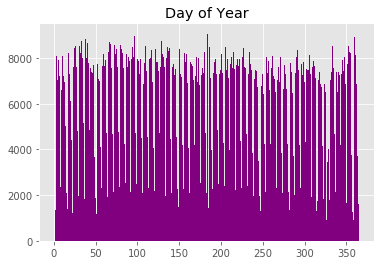

In [11]:
la_ticket_2017.hist('Day of Year', bins=365, color = 'purple')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122513390>]],
      dtype=object)

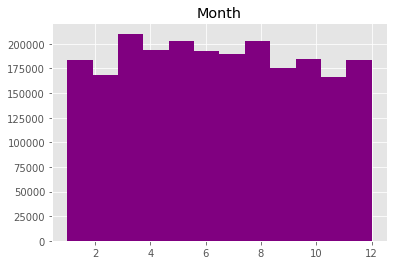

In [31]:
la_ticket_2017.hist('Month', bins=12, color = 'purple')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12273a588>]],
      dtype=object)

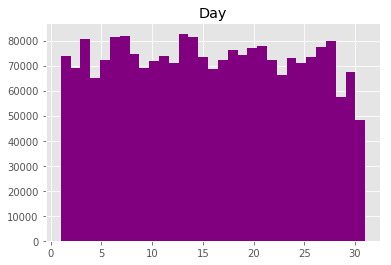

In [33]:
la_ticket_2017.hist('Day', bins=31, color = 'purple')

In [12]:
len(la_ticket_2017)/365

6176.243835616438

In [13]:
sum_fine_by_day = la_ticket_2017.groupby('Day of Year')['Fine amount'].sum()

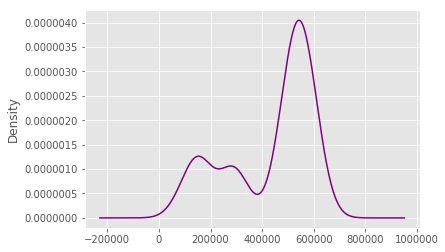

In [14]:
sum_fine_by_day.plot.density(color = 'purple')

In [15]:
min(sum_fine_by_day)

66175.0

In [19]:
np.mean(sum_fine_by_day)

434094.1369863014

In [20]:
max(sum_fine_by_day)

656276.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121bfceb8>]],
      dtype=object)

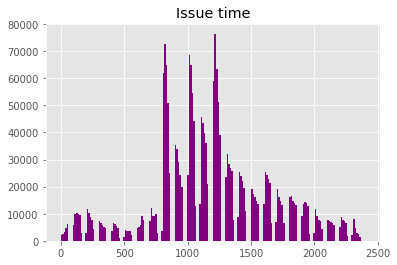

In [29]:
la_ticket_2017.hist('Issue time', range=(0, 2400), bins=200, color = 'purple')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1222d7588>]],
      dtype=object)

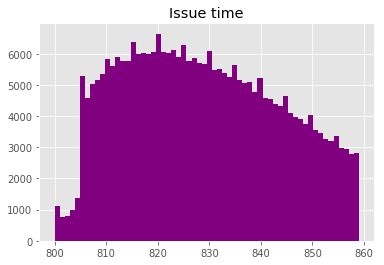

In [30]:
la_ticket_2017.hist('Issue time', range=(800, 859), bins=60, color = 'purple')

### More generous on holidays?
- new years = 1/1
- MLK day = 1/16
- Valentines day = 2/14
- 5/29 memorial day
- 9/4 labor day
- 11/10 Vetrans day
- 4th of July = 7/4
- Halloween - 10/31
- Thanksgiving = 11/23
- Christmas = 12/25

In [226]:
holidays = pd.Series(['2017/01/01',
                      '2017/01/16',
                      '2017/02/14',
                      '2017/05/29',
                      '2017/07/04',
                      '2017/09/04',
                      '2017/10/31',
                      '2017/11/10',
                      '2017/11/23',
                      '2017/12/25'],
                     index = ['New Years Day',
                              'MLK Day',
                              'Valentines Day',
                              'Memorial Day',
                              'Independence Day',
                              'Labor Day',
                              'Halloween',
                              'Veterans Day',
                              'Thanksgiving',
                              'Christmas']
                    )

holidays

New Years Day       2017/01/01
MLK Day             2017/01/16
Valentines Day      2017/02/14
Memorial Day        2017/05/29
Independence Day    2017/07/04
Labor Day           2017/09/04
Halloween           2017/10/31
Veterans Day        2017/11/10
Thanksgiving        2017/11/23
Christmas           2017/12/25
dtype: object

In [227]:
holidays_date = pd.to_datetime(holidays, format='%Y/%m/%d')
holidays_doy = holidays_date.dt.dayofyear
holidays_doy

New Years Day         1
MLK Day              16
Valentines Day       45
Memorial Day        149
Independence Day    185
Labor Day           247
Halloween           304
Veterans Day        314
Thanksgiving        327
Christmas           359
dtype: int64

In [229]:
holiday_tickets = pd.DataFrame(columns=['Number of Tickets'], index = holidays_doy.index)
holiday_tickets

,Number of Tickets
New Years Day,NaN
MLK Day,NaN
Valentines Day,NaN
Memorial Day,NaN
Independence Day,NaN
Labor Day,NaN
Halloween,NaN
Veterans Day,NaN
Thanksgiving,NaN
Christmas,NaN


In [230]:
i = 0

while i <= len(holidays_doy) - 1:
    holiday_tickets.iloc[i, ] = sum(la_ticket_2017['Day of Year'] == holidays_doy.iloc[i])
    i = i + 1

In [231]:
holiday_tickets

,Number of Tickets
New Years Day,1115
MLK Day,1375
Valentines Day,7388
Memorial Day,1496
Independence Day,1445
Labor Day,1318
Halloween,7498
Veterans Day,1104
Thanksgiving,922
Christmas,893


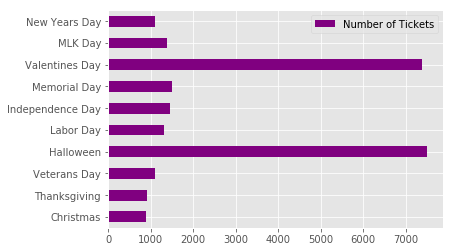

In [232]:
holiday_tickets.plot(kind = 'barh', color = 'purple').invert_yaxis()